# Final Project

Description: Inspired by the recent decision by the US supreme court to federally permit betting on sporting events, the intent of this fnal project is to use existing data from the outcomes of NBA games to predict the winners of future matchups. The ultimate intent is to create a classifier that is similar in accuracy to the models created by sports betting agencies so as to make reliable predictions and know which games to bet on. While the analysis in this project will likely not incorporte sufficient data to be reliable in predictions that "beat vegas," it should serve as a good starting point for understanding which inputs are important for predicting NBA outcomes. 

## Part 1: Data Clean-up

Combines 3 separate datasets that contain game outcomes, team rankings, and player stats.

In [68]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Data files

games_data = "../data/games.csv"
standings_data = "../data/ranking.csv"
details_data = '../data/games_details.csv'
advanced_data = '../data/advanced_stats.csv'

In [70]:
# Open and read datasets

g_data = pd.read_csv(games_data)
s_data = pd.read_csv(standings_data)
d_data = pd.read_csv(details_data)
a_data = pd.read_csv(advanced_data)

data = g_data[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS']]
data[['H_ABR', 'A_ABR', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']] = ""


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-70-68a339997763>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['H_ABR', 'A_ABR', 'HOME_PCT', 'AWAY_PCT

In [71]:
# Combining datasets to include record
data.columns
first_10 = data.iloc[:10]

def combine(df):
    for index, row in df.iterrows():
        date = row['GAME_DATE_EST']
        day = s_data[s_data['STANDINGSDATE'] == date]
        for i, r in day.iterrows():
            if(r['TEAM_ID'] == row['HOME_TEAM_ID']):
                df.at[index, 'HOME_PCT'] = r['W_PCT']
                df.at[index, 'HOME_hr'] = r['HOME_RECORD']
                df.at[index, 'HOME_ar'] = r['ROAD_RECORD']

            if(r['TEAM_ID'] == row['VISITOR_TEAM_ID']):
                df.at[index, 'AWAY_PCT'] = r['W_PCT']
                df.at[index, 'AWAY_hr'] = r['HOME_RECORD']
                df.at[index, 'AWAY_ar'] = r['ROAD_RECORD']


                
combine(data)                
data.head(5)

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,H_ABR,A_ABR,HOME_PCT,AWAY_PCT,HOME_hr,HOME_ar,AWAY_hr,AWAY_ar,HOME_inj,AWAY_inj,H_FG_pct,A_FG_pct,H_PPG,A_PPG
0,2022-03-12,22101005,1610612748,1610612750,0,,,0.652,0.565,24-9,21-15,22-12,17-18,,,,,,
1,2022-03-12,22101006,1610612741,1610612739,1,,,0.612,0.567,25-10,16-16,20-11,18-18,,,,,,
2,2022-03-12,22101007,1610612759,1610612754,0,,,0.382,0.338,13-21,13-21,15-19,8-26,,,,,,
3,2022-03-12,22101008,1610612744,1610612749,1,,,0.676,0.618,28-7,18-15,24-12,18-14,,,,,,
4,2022-03-12,22101009,1610612743,1610612761,0,,,0.588,0.552,20-13,20-15,17-15,20-15,,,,,,


In [72]:
# Combining data to include injuries and abbreviations

def player_data(df):
    for index, row in df.iterrows():
        game = row['GAME_ID']
        players = d_data[d_data['GAME_ID'] == game]
        hinj = 0
        ainj = 0
        for i, r in players.iterrows():
            if(r['TEAM_ID'] == row['HOME_TEAM_ID']):
                df.at[index, 'H_ABR'] = r['TEAM_ABBREVIATION']
                if(r['COMMENT'] == 'DND - Injury/Illness'):
                    hinj += 1

            if(r['TEAM_ID'] == row['VISITOR_TEAM_ID']):
                df.at[index, 'A_ABR'] = r['TEAM_ABBREVIATION']
                if(r['COMMENT'] == 'DND - Injury/Illness'):
                    ainj += 1
        df.at[index, 'HOME_inj'] = hinj
        df.at[index, 'AWAY_inj'] = ainj

                
            
player_data(data)
data.head()


,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,H_ABR,A_ABR,HOME_PCT,AWAY_PCT,HOME_hr,HOME_ar,AWAY_hr,AWAY_ar,HOME_inj,AWAY_inj,H_FG_pct,A_FG_pct,H_PPG,A_PPG
0,2022-03-12,22101005,1610612748,1610612750,0,MIA,MIN,0.652,0.565,24-9,21-15,22-12,17-18,0,0,,,,
1,2022-03-12,22101006,1610612741,1610612739,1,CHI,CLE,0.612,0.567,25-10,16-16,20-11,18-18,0,0,,,,
2,2022-03-12,22101007,1610612759,1610612754,0,SAS,IND,0.382,0.338,13-21,13-21,15-19,8-26,2,0,,,,
3,2022-03-12,22101008,1610612744,1610612749,1,GSW,MIL,0.676,0.618,28-7,18-15,24-12,18-14,0,0,,,,
4,2022-03-12,22101009,1610612743,1610612761,0,DEN,TOR,0.588,0.552,20-13,20-15,17-15,20-15,0,0,,,,


In [73]:
# Adding yet MORE data: Season averages for FG percentage and points per game 

def advanced_join(df):
    hits = 0
    zeros = 0
    for index, row in df.iterrows():
        season = row['GAME_DATE_EST'].split('-')[0]
        home = row['H_ABR']
        away = row['A_ABR']
        h_team = a_data.loc[(a_data['season'] == int(season)) & (a_data['abbreviation'] == home)]
        a_team = a_data.loc[(a_data['season'] == int(season)) & (a_data['abbreviation'] == away)]
        
        if((h_team.shape[0] > 0) & (a_team.shape[0] > 0)):
            hits += 1
            df.at[index, 'H_FG_pct'] = h_team.iloc[0]['fg_percent']
            df.at[index, 'A_FG_pct'] = a_team.iloc[0]['fg_percent']
            df.at[index, 'H_PPG'] = h_team.iloc[0]['pts_per_game']
            df.at[index, 'A_PPG'] = a_team.iloc[0]['pts_per_game']
        else:
            zeros += 1
            df.at[index, 'H_FG_pct'] = a_data.loc[a_data['season'] == int(season)]['fg_percent'].mean()
            df.at[index, 'A_FG_pct'] = a_data.loc[a_data['season'] == int(season)]['fg_percent'].mean()
            df.at[index, 'H_PPG'] = a_data.loc[a_data['season'] == int(season)]['pts_per_game'].mean()
            df.at[index, 'A_PPG'] = a_data.loc[a_data['season'] == int(season)]['pts_per_game'].mean()
    print("Zeros:", zeros)
    print("Hits:", hits)
                
            
advanced_join(data)
data.head()

Zeros: 3427
Hits: 22369


,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,H_ABR,A_ABR,HOME_PCT,AWAY_PCT,HOME_hr,HOME_ar,AWAY_hr,AWAY_ar,HOME_inj,AWAY_inj,H_FG_pct,A_FG_pct,H_PPG,A_PPG
0,2022-03-12,22101005,1610612748,1610612750,0,MIA,MIN,0.652,0.565,24-9,21-15,22-12,17-18,0,0,0.467,0.457,110,115.9
1,2022-03-12,22101006,1610612741,1610612739,1,CHI,CLE,0.612,0.567,25-10,16-16,20-11,18-18,0,0,0.48,0.469,111.6,107.8
2,2022-03-12,22101007,1610612759,1610612754,0,SAS,IND,0.382,0.338,13-21,13-21,15-19,8-26,2,0,0.467,0.463,113.2,111.5
3,2022-03-12,22101008,1610612744,1610612749,1,GSW,MIL,0.676,0.618,28-7,18-15,24-12,18-14,0,0,0.469,0.468,111,115.5
4,2022-03-12,22101009,1610612743,1610612761,0,DEN,TOR,0.588,0.552,20-13,20-15,17-15,20-15,0,0,0.483,0.445,112.7,109.4


In [74]:
# Parse the dataset and convert record to be number of wins
# If a team has played no games yet, (i.e. datapoint is season opener) use default win percentage of 0.5

for index, row in data.iterrows():
    split1 = row['HOME_hr'].split('-')
    split2 = row['HOME_ar'].split('-')
    split3 = row['AWAY_hr'].split('-')
    split4 = row['AWAY_ar'].split('-')
    if((int(split1[0])+int(split1[1])) == 0):
        data.at[index, 'HOME_hr'] = 0.5
    else:
        data.at[index, 'HOME_hr'] = int(split1[0])/(int(split1[0])+int(split1[1]))
    if((int(split2[0])+int(split2[1])) == 0):
        data.at[index, 'HOME_ar'] = 0.5
    else:
        data.at[index, 'HOME_ar'] = int(split2[0])/(int(split2[0])+int(split2[1]))
    if((int(split3[0])+int(split3[1])) == 0):
        data.at[index, 'AWAY_hr'] = 0.5
    else:
        data.at[index, 'AWAY_hr'] = int(split3[0])/(int(split3[0])+int(split3[1]))
    if((int(split4[0])+int(split4[1])) == 0):
        data.at[index, 'AWAY_ar'] = 0.5
    else:
        data.at[index, 'AWAY_ar'] = int(split4[0])/(int(split4[0])+int(split4[1]))
    
data.head()
    
    

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,H_ABR,A_ABR,HOME_PCT,AWAY_PCT,HOME_hr,HOME_ar,AWAY_hr,AWAY_ar,HOME_inj,AWAY_inj,H_FG_pct,A_FG_pct,H_PPG,A_PPG
0,2022-03-12,22101005,1610612748,1610612750,0,MIA,MIN,0.652,0.565,0.727273,0.583333,0.647059,0.485714,0,0,0.467,0.457,110,115.9
1,2022-03-12,22101006,1610612741,1610612739,1,CHI,CLE,0.612,0.567,0.714286,0.5,0.645161,0.5,0,0,0.48,0.469,111.6,107.8
2,2022-03-12,22101007,1610612759,1610612754,0,SAS,IND,0.382,0.338,0.382353,0.382353,0.441176,0.235294,2,0,0.467,0.463,113.2,111.5
3,2022-03-12,22101008,1610612744,1610612749,1,GSW,MIL,0.676,0.618,0.8,0.545455,0.666667,0.5625,0,0,0.469,0.468,111,115.5
4,2022-03-12,22101009,1610612743,1610612761,0,DEN,TOR,0.588,0.552,0.606061,0.571429,0.53125,0.571429,0,0,0.483,0.445,112.7,109.4


## Part 2: Correlation Testing

Below, look at our initial data to find out which variables are highly correlated

<ipython-input-75-a3a95771d20d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:>

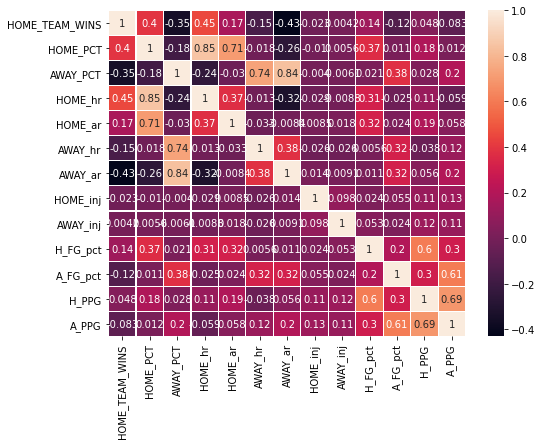

In [75]:
# Correlation map
data.dropna(inplace=True)
vals = data[['HOME_TEAM_WINS', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
vals[['HOME_TEAM_WINS', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']] = vals[['HOME_TEAM_WINS', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']].astype(float)
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6)) 
corr = vals.corr()
sns.heatmap(corr, linewidths=.1, annot=True, ax=ax)



## Part 3: Model Testing

We will attempt to classify the winning team with a number of different models:
1. KNN
2. Logistic Regression
3. Decision Tree classification


### Model 1: KNN

First, come up with a simple KNN model

In [76]:
# Simplest Model

from sklearn.neighbors import KNeighborsClassifier


X = data[['HOME_PCT', 'AWAY_PCT']]
Y = data[['HOME_TEAM_WINS']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", knn.score(X_train, Y_train))
print("Baseline test score:", knn.score(X_test, Y_test))


Baseline train score: 0.7735995347935647
Baseline test score: 0.6901162790697675


In [77]:
# Add other features

from sklearn.model_selection import train_test_split

X = data[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
Y = data[['HOME_TEAM_WINS']]
#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [78]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", knn.score(X_train, Y_train))
print("Baseline test score:", knn.score(X_test, Y_test))


Baseline train score: 0.7840666795890676
Baseline test score: 0.6732558139534883


#### Improving the Model

The basic model has a testing accuracy of around 67%. Let's see if this can be improved by normalizing our data and optimizing the number of neighbors.

In [79]:
# Data Normalization

from sklearn.preprocessing import MinMaxScaler

numerical = ['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']
scaler = MinMaxScaler()

scaled = data.copy()
scaled[numerical] = scaler.fit_transform(scaled[numerical])

X = scaled[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [80]:
# Number of Neighbors optimization

from sklearn.model_selection import GridSearchCV

#create new a knn model
new_knn = KNeighborsClassifier(weights='distance')

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,35)}

#use gridsearch to test all values for n_neighbors
gs_knn = GridSearchCV(new_knn, param_grid=grid_dictionary)

#fit model to data
gs_knn.fit(X_train, Y_train.values.ravel())


GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])})

In [81]:
# Print out best result

gs_knn.best_params_

{'n_neighbors': 34}

In [82]:
# redo simplest model

X = scaled[['HOME_PCT', 'AWAY_PCT']]
Y = scaled[['HOME_TEAM_WINS']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", knn.score(X_train, Y_train))
print("Baseline test score:", knn.score(X_test, Y_test))


Baseline train score: 0.7348323318472573
Baseline test score: 0.7251937984496124


In [83]:
# Test new model with all params

X = scaled[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
Y = scaled[['HOME_TEAM_WINS']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

new_knn = new_knn = KNeighborsClassifier(weights='distance', n_neighbors = 30)

new_knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", new_knn.score(X_train, Y_train))
print("Baseline test score:", new_knn.score(X_test, Y_test))

Baseline train score: 0.9888544291529366
Baseline test score: 0.7296511627906976


In [84]:
#. New model with highest correlated params

X = scaled[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'AWAY_ar', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
Y = scaled[['HOME_TEAM_WINS']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

new_knn = new_knn = KNeighborsClassifier(weights='distance', n_neighbors = 30)

new_knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", new_knn.score(X_train, Y_train))
print("Baseline test score:", new_knn.score(X_test, Y_test))

Baseline train score: 0.9881275440976933
Baseline test score: 0.7430232558139535


Still this is not as good as our model with all parameters present. Let's try adding expert knowledge.

#### Expert Knowledge

Already this undeniably improves upon the basic model, but lets try adding expert knowledge by scaling even further based on correlation with home team victory.

In [85]:
import math

# increase influence of distances across important attributes

# we can further scale each attribute based on its correlation with price

biased = scaled.copy()

columns = biased.columns.to_numpy().tolist()
print(columns)

for column in columns[7:]:
    biased[column] = abs(corr['HOME_TEAM_WINS'][column]) * biased[column]
    print(abs(corr['HOME_TEAM_WINS'][column]))
    
    


['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS', 'H_ABR', 'A_ABR', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct', 'H_PPG', 'A_PPG']
0.39515150073742616
0.34930677978152774
0.4534247313472268
0.16908296246640292
0.15328976504682298
0.4317335178382109
0.023259605180069653
0.004180505871842594
0.1377645179424452
0.12409035825806856
0.04828756835294695
0.08344818842090257


In [86]:
X = biased[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
Y = biased[['HOME_TEAM_WINS']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Test new model
new_knn = new_knn = KNeighborsClassifier(weights='distance', n_neighbors = 32)

new_knn.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", new_knn.score(X_train, Y_train))
print("Baseline test score:", new_knn.score(X_test, Y_test))

Baseline train score: 0.9883698391161078
Baseline test score: 0.7381782945736434


A tad bit better but not by much. Let's use cross validation to confirm. 

In [87]:
# Use Cross validation to test if our model improves

from sklearn.model_selection import cross_val_score


#use gridsearch to test all values for n_neighbors
best_k = GridSearchCV(new_knn, param_grid=grid_dictionary)

#fit model to data
best_k.fit(X_train, Y_train.values.ravel())

knn_final = KNeighborsClassifier(n_neighbors=best_k.best_params_['n_neighbors'], weights='distance')
knn_final.fit(X_train, Y_train.values.ravel())

# train model with cv of 20 
cv_scores = cross_val_score(knn_final, X, Y.values.ravel(), cv=20)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72170543 0.72015504 0.69767442 0.75968992 0.74418605 0.70930233
 0.76356589 0.75426357 0.7620155  0.77054264 0.71782946 0.7248062
 0.74496124 0.71395349 0.70775194 0.75426357 0.74321179 0.73545384
 0.75640031 0.75640031]
cv_scores mean:0.7379066459787949


### Logistic Regression

Run a logistic regression model using our altered data

In [88]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0)
logit.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", logit.score(X_train, Y_train))
print("Baseline test score:", logit.score(X_test, Y_test))

Baseline train score: 0.7519383601473154
Baseline test score: 0.7505813953488372


The model outperforms the KNN model, but not by much. Lets give cross validation a try and see if this model is actually better than the KNN model.

In [89]:
cv_scores_logit = cross_val_score(clf, X, Y.values.ravel(), cv=20)

print(cv_scores_logit)
print('cv_scores mean:{}'.format(np.mean(cv_scores_logit)))

[0.73875969 0.73410853 0.70155039 0.77674419 0.75736434 0.74186047
 0.76511628 0.76666667 0.75891473 0.76356589 0.73100775 0.73100775
 0.74651163 0.71627907 0.79689922 0.75813953 0.742436   0.74631497
 0.77734678 0.76415826]
cv_scores mean:0.7507376068221866


It would appear this is the best model we have come up with so far - a google search shows that from historical NBA data, the favored team wins 68 percent of the time, so producing a model that is 75 percent accurate is a not insignificant improvement on the historical predicted trends with betting data

### Support Vector

In [90]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


svc = SVC(kernel='linear')
svc.fit(X_train, Y_train.values.ravel())

print("Baseline train score:", svc.score(X_train, Y_train))
print("Baseline test score:", svc.score(X_test, Y_test))

Baseline train score: 0.7517929831362667
Baseline test score: 0.7474806201550388


In [91]:
cv_scores_svc = cross_val_score(svc, X, Y.values.ravel(), cv=20)

print(cv_scores_svc)
print('cv_scores mean:{}'.format(np.mean(cv_scores_svc)))

[0.74031008 0.74108527 0.70465116 0.77829457 0.75271318 0.73953488
 0.76744186 0.76511628 0.76124031 0.76124031 0.73100775 0.72945736
 0.73953488 0.7124031  0.72015504 0.75581395 0.74088441 0.742436
 0.77269201 0.76105508]
cv_scores mean:0.7458533747090768


### Decision Tree

Would a decision tree be able to classify this data better? Would converting to categorical data be more effective? I will experiment with numerical and categorical decision trees here.

#### Numerical

It is easy enough to create a decision tree using our existing numerical data, so we will do that first. 

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

num_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7)
num_tree.fit(X_train,Y_train)

print("Baseline train score:", num_tree.score(X_train, Y_train))
print("Baseline test score:", num_tree.score(X_test, Y_test))

Baseline train score: 0.7565419654971893
Baseline test score: 0.7393410852713178


In [93]:
from sklearn.tree import export_text
r = export_text(num_tree, feature_names=X.columns.tolist())
print(r)

|--- HOME_hr <= 0.25
|   |--- AWAY_ar <= 0.18
|   |   |--- AWAY_ar <= 0.06
|   |   |   |--- AWAY_ar <= 0.02
|   |   |   |   |--- class: 1
|   |   |   |--- AWAY_ar >  0.02
|   |   |   |   |--- AWAY_hr <= 0.02
|   |   |   |   |   |--- H_PPG <= 0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- H_PPG >  0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- AWAY_hr >  0.02
|   |   |   |   |   |--- AWAY_hr <= 0.11
|   |   |   |   |   |   |--- AWAY_ar <= 0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- AWAY_ar >  0.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AWAY_hr >  0.11
|   |   |   |   |   |   |--- H_PPG <= 0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- H_PPG >  0.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- AWAY_ar >  0.06
|   |   |   |--- HOME_hr <= 0.19
|   |   |   |   |--- HOME_hr <= 0.13
|   |   |   |   |   |--- HOME_PCT <= 0.04
|   |   |   |   |   |   |--- class

#### Categorical

And now to convert the data to categorical. This will require expert knowledge on the various stats.

We will also need to copy the code from the earlier lab on decision trees as SKLearn's tree classifier does not work for constructing trees with categorical variables. This section will be for visualization purposes only.

In [94]:
data_cat = data.copy()
print(data_cat.columns)
print(data_cat[:5])

Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'HOME_TEAM_WINS', 'H_ABR', 'A_ABR', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr',
       'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct',
       'A_FG_pct', 'H_PPG', 'A_PPG'],
      dtype='object')
  GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  HOME_TEAM_WINS  \
0    2022-03-12  22101005    1610612748       1610612750               0   
1    2022-03-12  22101006    1610612741       1610612739               1   
2    2022-03-12  22101007    1610612759       1610612754               0   
3    2022-03-12  22101008    1610612744       1610612749               1   
4    2022-03-12  22101009    1610612743       1610612761               0   

  H_ABR A_ABR HOME_PCT AWAY_PCT   HOME_hr   HOME_ar   AWAY_hr   AWAY_ar  \
0   MIA   MIN    0.652    0.565  0.727273  0.583333  0.647059  0.485714   
1   CHI   CLE    0.612    0.567  0.714286       0.5  0.645161       0.5   
2   SAS   IND    0.382    0.338  0

In [95]:
# FG percentage
fgp_column = data_cat["H_FG_pct"]
print("From:", fgp_column.min(), "to", fgp_column.max())

From: 0.408 to 0.503


In [96]:
# PPG
ppg_column = data_cat["H_PPG"]
print("From:", ppg_column.min(), "to", ppg_column.max())

From: 84.2 to 120.1


In [97]:
# Convert all 'objects' to 'floats'

data_cat[['HOME_TEAM_WINS', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']] = data_cat[['HOME_TEAM_WINS', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']].astype(float)

# Replace each value with a category

# Pct to bins for all 6 percentage columns
bins = [0, 0.3, 0.5, 0.7, 1.0]
names = [ 'Poor', 'Below Average',  'Above Average', 'Elite']

data_cat['HOME_PCT'] = pd.cut(data_cat['HOME_PCT'], bins, labels=names)
data_cat['AWAY_PCT'] = pd.cut(data_cat['AWAY_PCT'], bins, labels=names)
data_cat['HOME_hr'] = pd.cut(data_cat['HOME_hr'], bins, labels=names)
data_cat['HOME_ar'] = pd.cut(data_cat['HOME_ar'], bins, labels=names)
data_cat['AWAY_hr'] = pd.cut(data_cat['AWAY_hr'], bins, labels=names)
data_cat['AWAY_ar'] = pd.cut(data_cat['AWAY_ar'], bins, labels=names)

# Injuries to bins

bins = [-1, 0.1, 1.1, np.inf]
names = [ 'None', 'One',  'Multiple']

data_cat['HOME_inj'] = pd.cut(data_cat['HOME_inj'], bins, labels=names)
data_cat['AWAY_inj'] = pd.cut(data_cat['AWAY_inj'], bins, labels=names)

# FG percentage to bins

bins = [0, 0.43, 0.45, 0.47, 1.0]
names = [ 'Poor', 'Below Average',  'Above Average', 'Elite']

data_cat['H_FG_pct'] = pd.cut(data_cat['H_FG_pct'], bins, labels=names)
data_cat['A_FG_pct'] = pd.cut(data_cat['A_FG_pct'], bins, labels=names)

# PPG to bins

bins = [0, 92, 102, 112, np.inf]
names = [ 'Poor', 'Below Average',  'Above Average', 'Elite']

data_cat['H_PPG'] = pd.cut(data_cat['H_PPG'], bins, labels=names)
data_cat['A_PPG'] = pd.cut(data_cat['A_PPG'], bins, labels=names)

# Home win to bins
bins = [0, 0.1, 1.1]
names = ['Win', 'Loss']

data_cat['HOME_TEAM_WINS'] = pd.cut(data_cat['HOME_TEAM_WINS'], bins, labels=names)

In [98]:
print(data_cat.columns)
print(data_cat[:5])

Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'HOME_TEAM_WINS', 'H_ABR', 'A_ABR', 'HOME_PCT', 'AWAY_PCT', 'HOME_hr',
       'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct',
       'A_FG_pct', 'H_PPG', 'A_PPG'],
      dtype='object')
  GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID HOME_TEAM_WINS H_ABR  \
0    2022-03-12  22101005    1610612748       1610612750            NaN   MIA   
1    2022-03-12  22101006    1610612741       1610612739           Loss   CHI   
2    2022-03-12  22101007    1610612759       1610612754            NaN   SAS   
3    2022-03-12  22101008    1610612744       1610612749           Loss   GSW   
4    2022-03-12  22101009    1610612743       1610612761            NaN   DEN   

  A_ABR       HOME_PCT       AWAY_PCT        HOME_hr        HOME_ar  \
0   MIN  Above Average  Above Average          Elite  Above Average   
1   CLE  Above Average  Above Average          Elite  Below Average   
2   IND  Below A

In [99]:
X_cat = data_cat[['HOME_PCT', 'AWAY_PCT', 'HOME_hr', 'HOME_ar', 'AWAY_hr', 'AWAY_ar', 'HOME_inj', 'AWAY_inj', 'H_FG_pct', 'A_FG_pct',  'H_PPG', 'A_PPG']]
Y_cat = data_cat[['HOME_TEAM_WINS']]






## Visualization

Here we create a web based application that allows the user to input their own data and come up with a prediction based on the historical data. Our best model was the logistic regression model, so we will use that as our classifier.

In [100]:
import pickle

best_model = logit

with open('web_app/logit_model_nba.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Using our unprocessed data, we need our max and min values for normalization. Because our max

In [101]:
# FG percentage
fgp_column = data["A_FG_pct"]
print("From:", fgp_column.min(), "to", fgp_column.max())

From: 0.408 to 0.503


In [102]:
# PPG 
fgp_column = data["A_PPG"]
print("From:", fgp_column.min(), "to", fgp_column.max())

From: 84.2 to 120.1


In [103]:
# Inj
fgp_column = data["AWAY_PCT"]
print("From:", fgp_column.min(), "to", fgp_column.max())

From: 0.0 to 1.0
